# Loan Data
This dataset consists of more than 9,500 loans with information on the loan structure, the borrower, and whether the loan was pain back in full. This data was extracted from LendingClub.com, which is a company that connects borrowers with investors.

Not sure where to begin? Scroll to the bottom to find challenges!

In [1]:
import pandas as pd
loan_data = pd.read_csv("/content/loan_data.csv")
print(loan_data.shape)
loan_data.head(100)

(9578, 14)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,debt_consolidation,0.0775,156.11,10.714418,5.00,762,2131.000000,1359,5.6,2,0,0,0
96,1,debt_consolidation,0.1154,329.95,12.323856,20.00,727,10292.000000,107501,44.8,2,0,0,0
97,1,all_other,0.0807,313.67,12.061047,0.72,787,8010.000000,3054,5.6,3,0,0,0
98,1,all_other,0.0807,297.99,11.407565,2.44,792,8717.958333,40384,9.6,0,0,0,0


## Data dictionary

|    | Variable          | Explanation                                                                                                             |
|---:|:------------------|:------------------------------------------------------------------------------------------------------------------------|
|  0 | credit_policy     | 1 if the customer meets the credit underwriting criteria; 0 otherwise.                                                  |
|  1 | purpose           | The purpose of the loan.                                                                                                |
|  2 | int_rate          | The interest rate of the loan (more risky borrowers are assigned higher interest rates).                                |
|  3 | installment       | The monthly installments owed by the borrower if the loan is funded.                                                    |
|  4 | log_annual_inc    | The natural log of the self-reported annual income of the borrower.                                                     |
|  5 | dti               | The debt-to-income ratio of the borrower (amount of debt divided by annual income).                                     |
|  6 | fico              | The FICO credit score of the borrower.                                                                                  |
|  7 | days_with_cr_line | The number of days the borrower has had a credit line.                                                                  |
|  8 | revol_bal         | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).                           |
|  9 | revol_util        | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). |
| 10 | inq_last_6mths    | The borrower's number of inquiries by creditors in the last 6 months.                                                   |
| 11 | delinq_2yrs       | The number of times the borrower had been 30+ days past due on a payment in the past 2 years.                           |
| 12 | pub_rec           | The borrower's number of derogatory public records.                                                                     |
| 13 | not_fully_paid    | 1 if the loan is not fully paid; 0 otherwise.   

[Source](https://www.kaggle.com/itssuru/loan-data) of dataset.

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Generate a correlation matrix between the numeric columns. What columns are positively and negatively correlated with each other? Does it change if you segment it by the purpose of the loan?
- 📊 **Visualize**: Plot histograms for every numeric column with a color element to segment the bars by `not_fully_paid`.
- 🔎 **Analyze**: Do loans with the same purpose have similar qualities not shared by loans with differing purposes? You can consider only fully paid loans.

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You recently got a job as a machine learning scientist at a startup that wants to automate loan approvals. As your first project, your manager would like you to build a classifier to predict whether a loan will be paid back based on this data. There are two things to note. First, there is class imbalance; there are fewer examples of loans not fully paid. Second, it's more important to accurately predict whether a loan will not be paid back rather than if a loan is paid back. Your manager will want to know how you accounted for this in training and evaluation your model.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

In [2]:
loan_data.isna().sum()

,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


In [3]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
loan_data[['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']].corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


<Axes: >

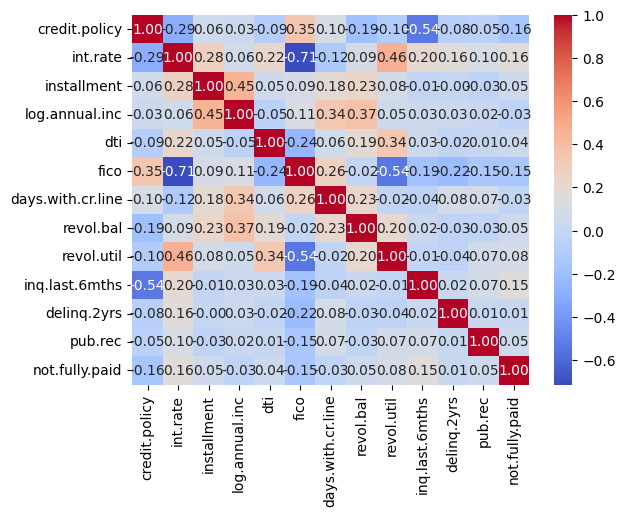

In [5]:
import seaborn as sns
sns.heatmap(loan_data[['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']].corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [6]:
loan_data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

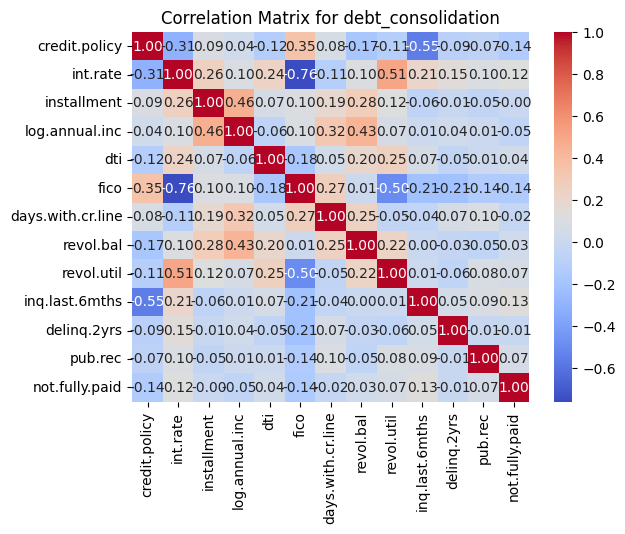

In [7]:
import matplotlib.pyplot as plt

sns.heatmap(loan_data.loc[loan_data['purpose'] == 'debt_consolidation',
              ['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
               'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
               'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Correlation Matrix for debt_consolidation")
plt.show()

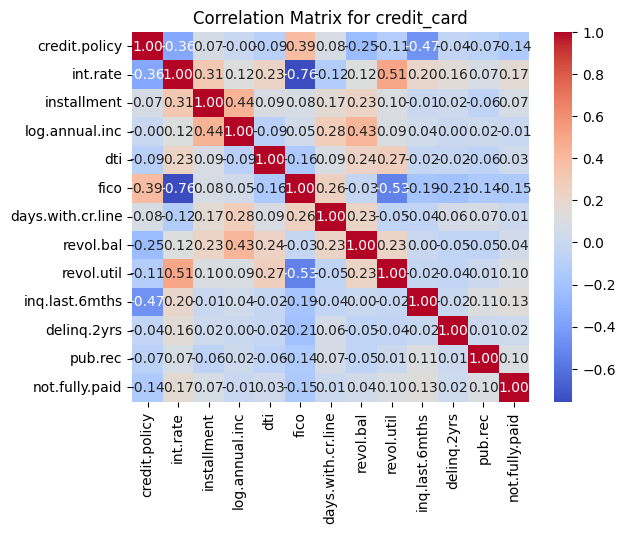

In [8]:
sns.heatmap(loan_data.loc[loan_data['purpose'] == 'credit_card',
              ['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
               'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
               'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Correlation Matrix for credit_card")
plt.show()

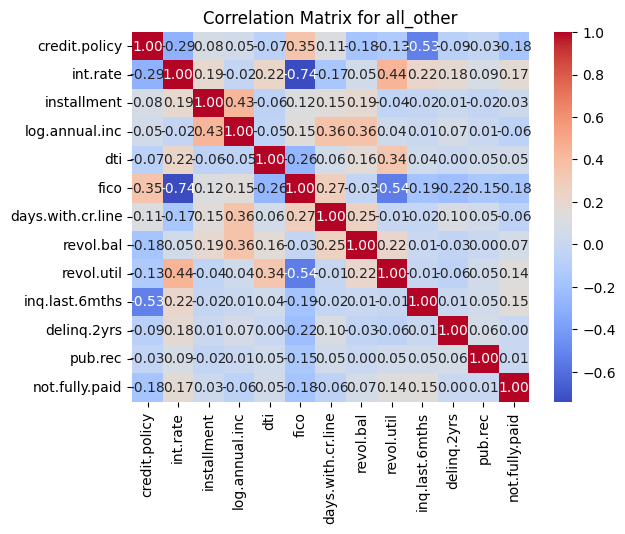

In [9]:
sns.heatmap(loan_data.loc[loan_data['purpose'] == 'all_other',
              ['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
               'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
               'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Correlation Matrix for all_other")
plt.show()

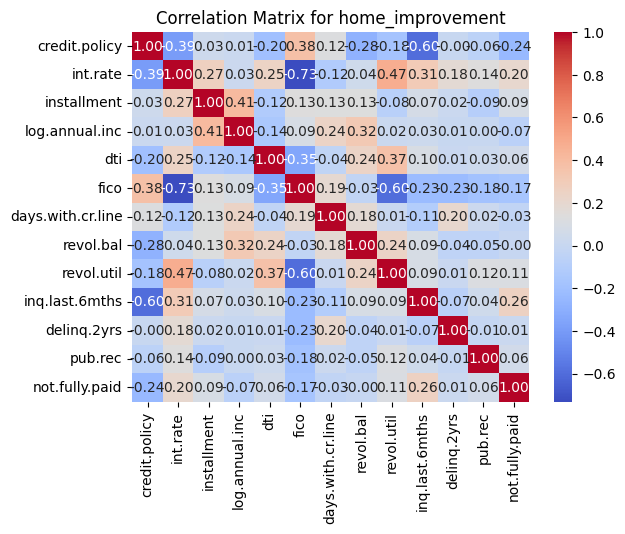

In [10]:
sns.heatmap(loan_data.loc[loan_data['purpose'] == 'home_improvement',
              ['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
               'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
               'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Correlation Matrix for home_improvement")
plt.show()

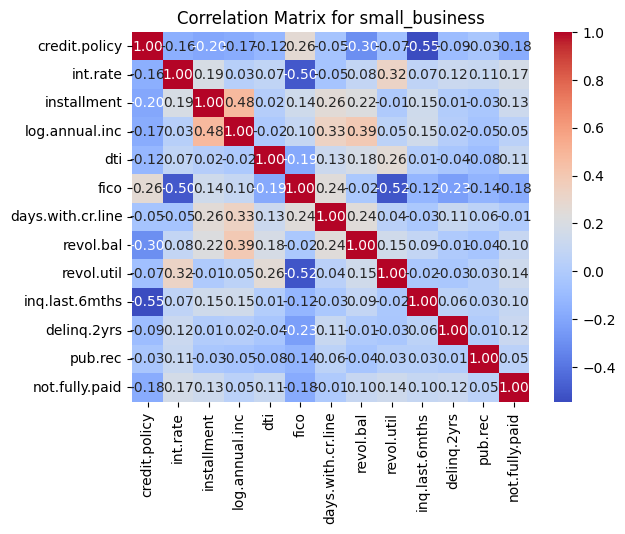

In [11]:
sns.heatmap(loan_data.loc[loan_data['purpose'] == 'small_business',
              ['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
               'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
               'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Correlation Matrix for small_business")
plt.show()

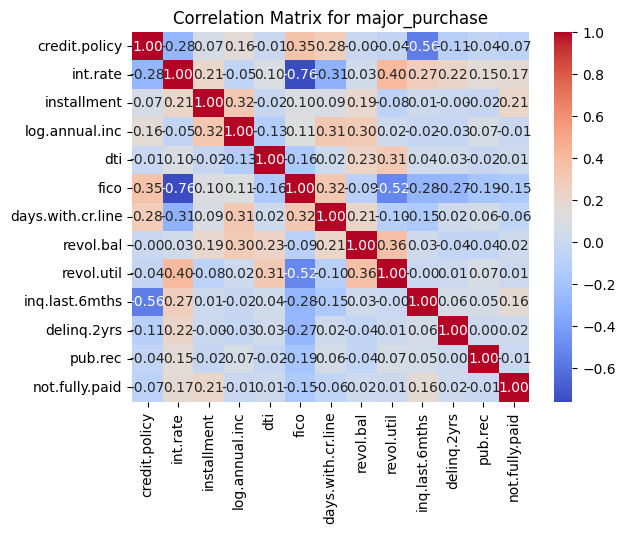

In [12]:
sns.heatmap(loan_data.loc[loan_data['purpose'] == 'major_purchase',
              ['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
               'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
               'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Correlation Matrix for major_purchase")
plt.show()

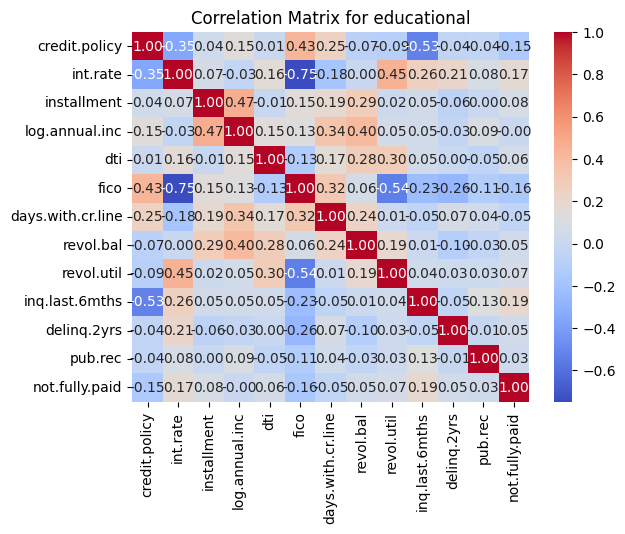

In [13]:
sns.heatmap(loan_data.loc[loan_data['purpose'] == 'educational',
              ['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
               'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
               'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Correlation Matrix for educational")
plt.show()

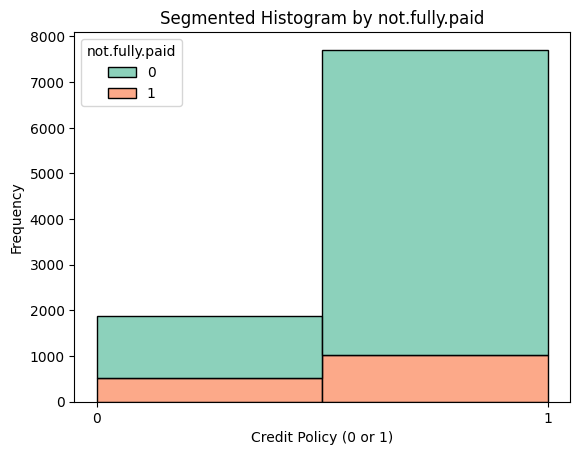

In [14]:
sns.histplot(
    data=loan_data,
    x='credit.policy',
    hue='not.fully.paid',
    multiple='stack',
    palette='Set2',
    bins=2
)

plt.xlabel('Credit Policy (0 or 1)')
plt.ylabel('Frequency')
plt.title('Segmented Histogram by not.fully.paid')
plt.xticks([0, 1], ['0', '1'])
plt.show()


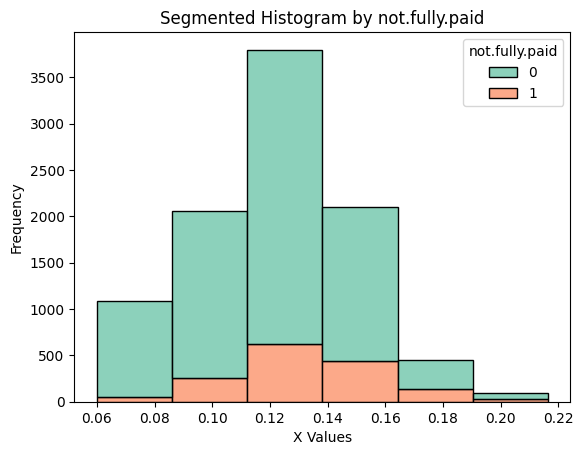

In [15]:
sns.histplot(data=loan_data, x='int.rate', hue='not.fully.paid', multiple='stack', palette='Set2',
             bins=6)

plt.xlabel('X Values')
plt.ylabel('Frequency')
plt.title('Segmented Histogram by not.fully.paid')
plt.show()

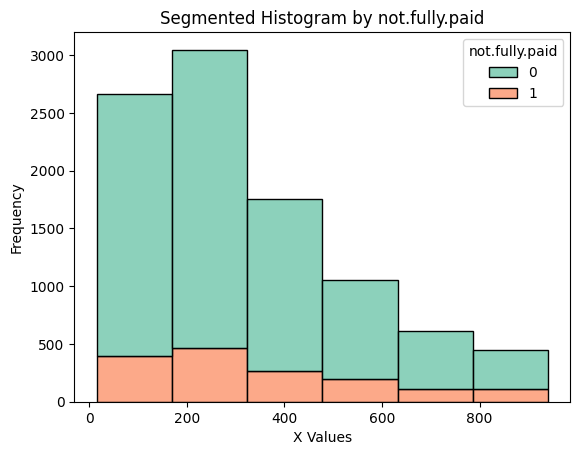

In [16]:
sns.histplot(data=loan_data, x='installment', hue='not.fully.paid', multiple='stack', palette='Set2',
             bins=6)

plt.xlabel('X Values')
plt.ylabel('Frequency')
plt.title('Segmented Histogram by not.fully.paid')
plt.show()
#'installment', 'log.annual.inc',
#               'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
#               'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'

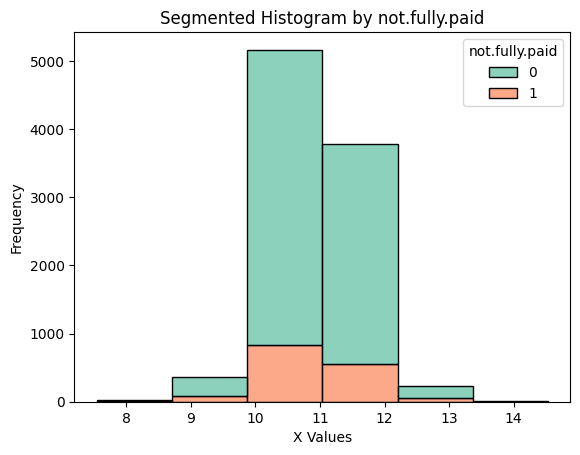

In [17]:
sns.histplot(data=loan_data, x='log.annual.inc', hue='not.fully.paid', multiple='stack', palette='Set2',
             bins=6)

plt.xlabel('X Values')
plt.ylabel('Frequency')
plt.title('Segmented Histogram by not.fully.paid')
plt.show()
#'installment', 'log.annual.inc',
#               'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
#               'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'

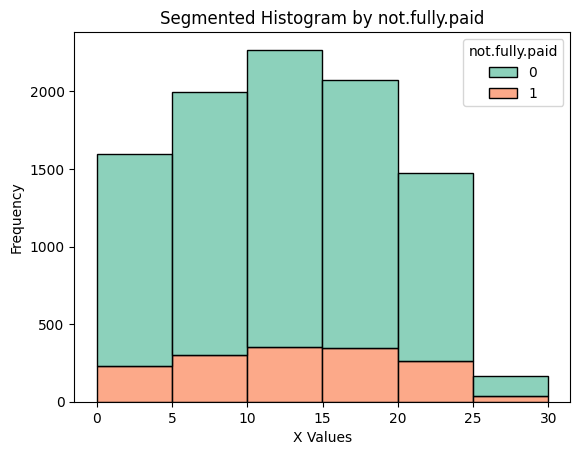

In [18]:
sns.histplot(data=loan_data, x='dti', hue='not.fully.paid', multiple='stack', palette='Set2',
             bins=6)

plt.xlabel('X Values')
plt.ylabel('Frequency')
plt.title('Segmented Histogram by not.fully.paid')
plt.show()
#'installment', 'log.annual.inc',
#               'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
#               'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'

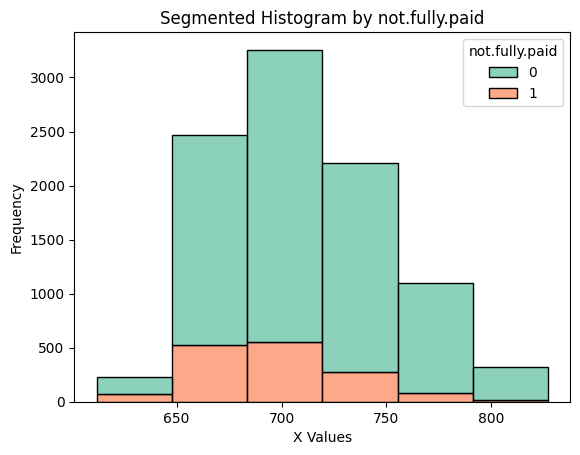

In [19]:
sns.histplot(data=loan_data, x='fico', hue='not.fully.paid', multiple='stack', palette='Set2',
             bins=6)

plt.xlabel('X Values')
plt.ylabel('Frequency')
plt.title('Segmented Histogram by not.fully.paid')
plt.show()
#'installment', 'log.annual.inc',
#               'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
#               'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'

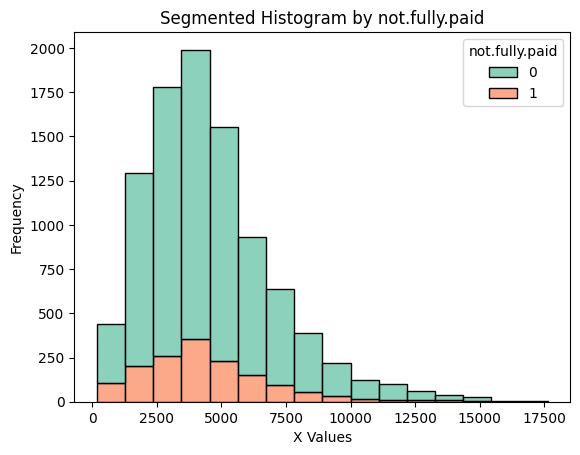

In [20]:
sns.histplot(data=loan_data, x='days.with.cr.line', hue='not.fully.paid', multiple='stack', palette='Set2',
             bins=16)

plt.xlabel('X Values')
plt.ylabel('Frequency')
plt.title('Segmented Histogram by not.fully.paid')
plt.show()
#'installment', 'log.annual.inc',
#               'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
#               'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'

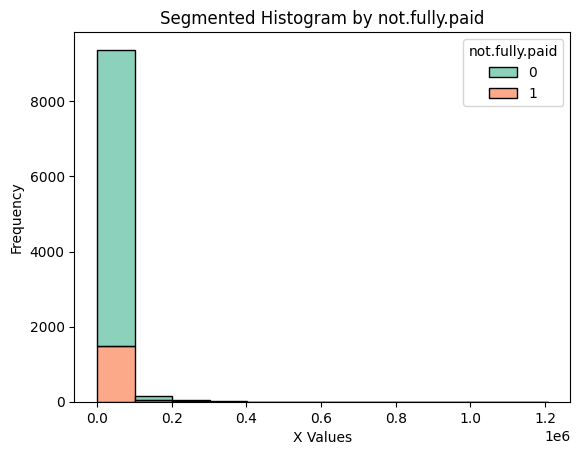

In [21]:
sns.histplot(data=loan_data, x='revol.bal', hue='not.fully.paid', multiple='stack', palette='Set2',
             bins=12)

plt.xlabel('X Values')
plt.ylabel('Frequency')
plt.title('Segmented Histogram by not.fully.paid')
plt.show()
#'installment', 'log.annual.inc',
#               'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
#               'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'

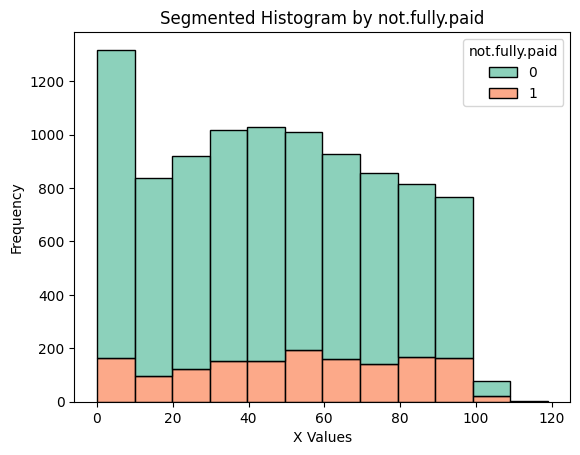

In [22]:
sns.histplot(data=loan_data, x='revol.util', hue='not.fully.paid', multiple='stack', palette='Set2',
             bins=12)

plt.xlabel('X Values')
plt.ylabel('Frequency')
plt.title('Segmented Histogram by not.fully.paid')
plt.show()
#'installment', 'log.annual.inc',
#               'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
#               'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'

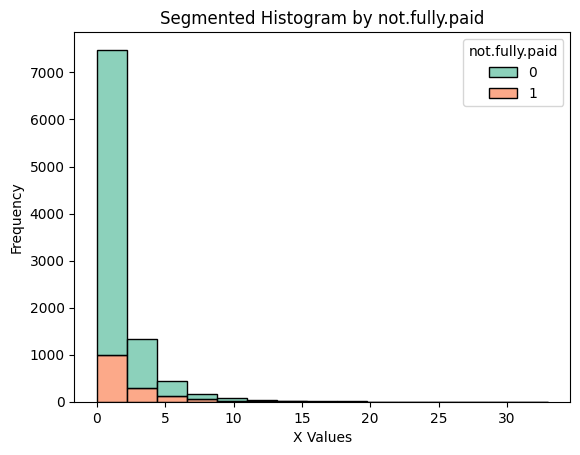

In [23]:
sns.histplot(data=loan_data, x='inq.last.6mths', hue='not.fully.paid', multiple='stack', palette='Set2',
             bins=15)

plt.xlabel('X Values')
plt.ylabel('Frequency')
plt.title('Segmented Histogram by not.fully.paid')
plt.show()
#'installment', 'log.annual.inc',
#               'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
#               'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'

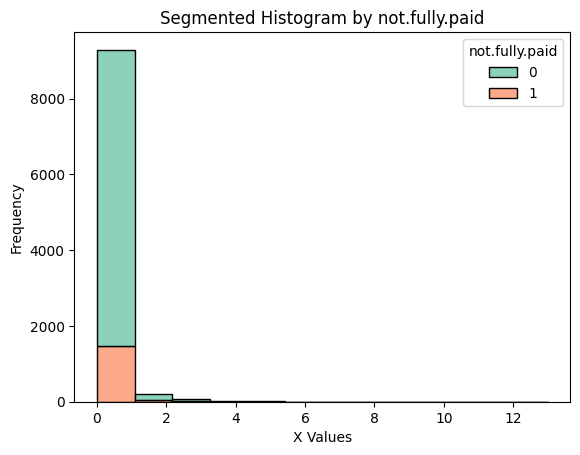

In [24]:
sns.histplot(data=loan_data, x='delinq.2yrs', hue='not.fully.paid', multiple='stack', palette='Set2',
             bins=12)

plt.xlabel('X Values')
plt.ylabel('Frequency')
plt.title('Segmented Histogram by not.fully.paid')
plt.show()
#'installment', 'log.annual.inc',
#               'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
#               'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'

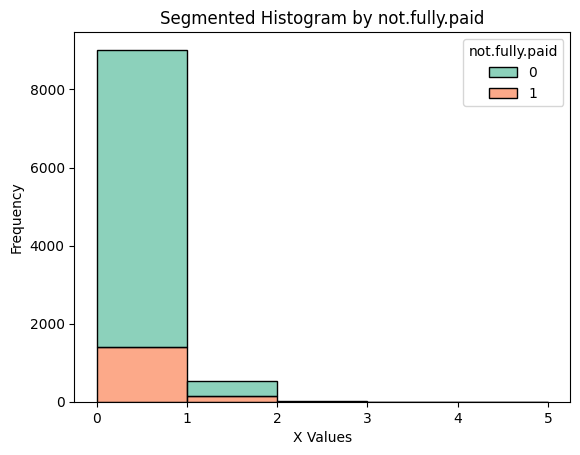

In [25]:
sns.histplot(data=loan_data, x='pub.rec', hue='not.fully.paid', multiple='stack', palette='Set2',
             bins=5)

plt.xlabel('X Values')
plt.ylabel('Frequency')
plt.title('Segmented Histogram by not.fully.paid')
plt.show()

In [26]:
ld_encode = loan_data.iloc[:, :13]

ld_encode = pd.concat([ld_encode, pd.get_dummies(ld_encode['purpose'], prefix='type', drop_first=True)], axis=1)  #drops the first column
#axis = 1 means to concatenate along the columns (put one column beside another)
ld_encode.drop(['purpose'], axis=1, inplace=True)  #get rid of the original Geography column
ld_encode

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,type_credit_card,type_debt_consolidation,type_educational,type_home_improvement,type_major_purchase,type_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,False,False,False,False,False,False
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,False,False,False,False,False,False
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,False,True,False,False,False,False
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,False,False,False,True,False,False


In [27]:
ld_encode.iloc[:, :18]

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,type_credit_card,type_debt_consolidation,type_educational,type_home_improvement,type_major_purchase,type_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,False,False,False,False,False,False
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,False,False,False,False,False,False
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,False,True,False,False,False,False
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,False,False,False,True,False,False


In [28]:
X = ld_encode.iloc[:, :18].values
X

array([[1, 0.1189, 829.1, ..., False, False, False],
       [1, 0.1071, 228.22, ..., False, False, False],
       [1, 0.1357, 366.86, ..., False, False, False],
       ...,
       [0, 0.1071, 97.81, ..., False, False, False],
       [0, 0.16, 351.58, ..., True, False, False],
       [0, 0.1392, 853.43, ..., False, False, False]], dtype=object)

In [29]:
y = loan_data['not.fully.paid'].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 1)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #note that we use the scale set from the training set to transform the test set
df = pd.DataFrame(X_train)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.494406,0.619247,0.521024,1.440155,-1.106306,2.001295,2.287297,-0.134374,-1.120296,-0.272740,-0.300302,-0.234694,-0.388547,-0.834196,-0.196554,-0.265350,-0.221067,3.744800
1,0.494406,1.039576,1.813874,0.573778,0.400636,-0.762380,-0.069535,0.056333,1.192248,0.653765,-0.300302,-0.234694,-0.388547,1.198759,-0.196554,-0.265350,-0.221067,-0.267037
2,0.494406,-1.363368,-0.014344,0.493637,-1.135369,1.080070,0.267170,0.156994,-0.923557,0.190513,-0.300302,-0.234694,-0.388547,-0.834196,-0.196554,3.768605,-0.221067,-0.267037
3,0.494406,-0.251170,-0.745399,-0.247907,-1.770406,0.948466,-0.418230,-0.473003,-1.337744,0.653765,-0.300302,-0.234694,-0.388547,-0.834196,-0.196554,-0.265350,-0.221067,-0.267037
4,0.494406,1.006099,-0.705904,-0.972367,0.309086,-1.025587,0.098843,-0.141071,1.499437,-0.735992,-0.300302,-0.234694,-0.388547,1.198759,-0.196554,-0.265350,-0.221067,-0.267037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,0.494406,0.102205,-0.896412,0.626214,1.212960,-0.235966,0.014654,0.577655,1.188797,-0.272740,-0.300302,-0.234694,-0.388547,1.198759,-0.196554,-0.265350,-0.221067,-0.267037
7658,-2.022629,-0.031706,0.873047,0.650010,0.647675,0.027241,-0.093567,0.610058,0.446712,1.580270,-0.300302,-0.234694,2.573690,-0.834196,-0.196554,-0.265350,-0.221067,-0.267037
7659,0.494406,0.131962,0.401763,-0.172541,-0.355015,-1.025587,1.728138,-0.018330,0.816028,-0.735992,-0.300302,3.511608,-0.388547,1.198759,-0.196554,-0.265350,-0.221067,-0.267037
7660,0.494406,1.262760,1.503718,0.247026,-0.494519,0.553656,-0.141665,-0.097350,0.098104,-0.272740,-0.300302,-0.234694,-0.388547,-0.834196,-0.196554,-0.265350,-0.221067,3.744800


In [32]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()

#add first hidden layer
model.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))

#add 2nd hidden layer
model.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))

In [33]:
model.add(keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid')) #Sigmoid for binary, Softmax for multiclass

In [34]:
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

In [35]:
#Training
history = model.fit(X_train, y_train, batch_size = 10, epochs = 200, verbose=2)

Epoch 1/200
767/767 - 2s - 3ms/step - accuracy: 0.8410 - loss: 0.4713
Epoch 2/200
767/767 - 1s - 2ms/step - accuracy: 0.8421 - loss: 0.4090
Epoch 3/200
767/767 - 2s - 2ms/step - accuracy: 0.8421 - loss: 0.4074
Epoch 4/200
767/767 - 2s - 2ms/step - accuracy: 0.8421 - loss: 0.4065
Epoch 5/200
767/767 - 2s - 3ms/step - accuracy: 0.8421 - loss: 0.4059
Epoch 6/200
767/767 - 1s - 2ms/step - accuracy: 0.8421 - loss: 0.4052
Epoch 7/200
767/767 - 1s - 1ms/step - accuracy: 0.8421 - loss: 0.4051
Epoch 8/200
767/767 - 1s - 2ms/step - accuracy: 0.8421 - loss: 0.4045
Epoch 9/200
767/767 - 1s - 1ms/step - accuracy: 0.8421 - loss: 0.4045
Epoch 10/200
767/767 - 1s - 2ms/step - accuracy: 0.8421 - loss: 0.4042
Epoch 11/200
767/767 - 1s - 1ms/step - accuracy: 0.8421 - loss: 0.4040
Epoch 12/200
767/767 - 1s - 2ms/step - accuracy: 0.8421 - loss: 0.4038
Epoch 13/200
767/767 - 2s - 2ms/step - accuracy: 0.8421 - loss: 0.4032
Epoch 14/200
767/767 - 2s - 3ms/step - accuracy: 0.8421 - loss: 0.4031
Epoch 15/200
76

In [36]:
loss, accuracy = model.evaluate(X_test, y_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8353 - loss: 0.4256


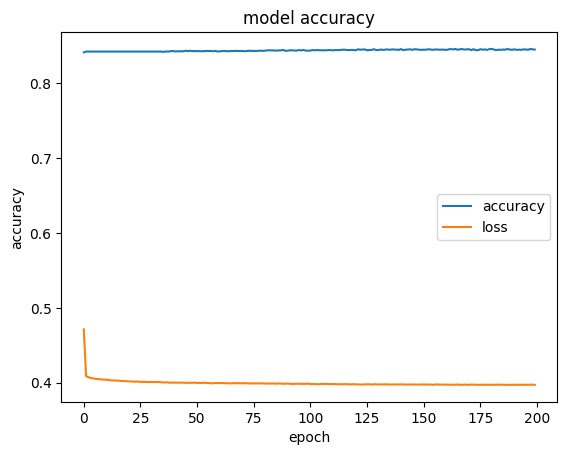

In [37]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','loss'])
plt.show()

In [38]:
model.save('/content/drive/MyDrive/vatIAtech/DSTI/ANN/practical/loan_model.h5')

In [39]:
model.save('/content/drive/MyDrive/vatIAtech/DSTI/ANN/practical/loan_model.keras')

In [40]:
my_trained_model = keras.models.load_model('/content/drive/MyDrive/vatIAtech/DSTI/ANN/practical/loan_model.h5')

In [41]:
y_test

array([0, 1, 1, ..., 0, 1, 1])

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
 [[1589    4]
 [ 314    9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1593
           1       0.69      0.03      0.05       323

    accuracy                           0.83      1916
   macro avg       0.76      0.51      0.48      1916
weighted avg       0.81      0.83      0.76      1916



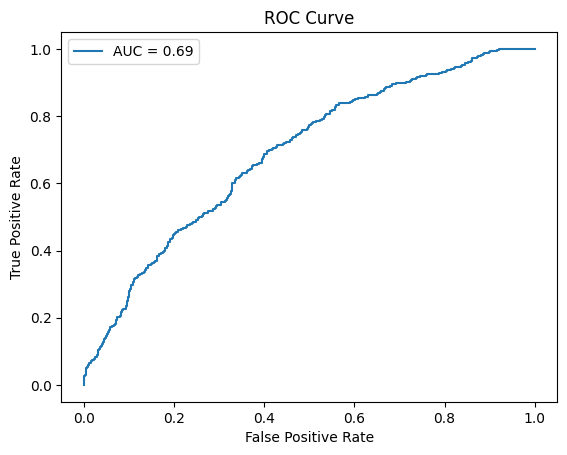

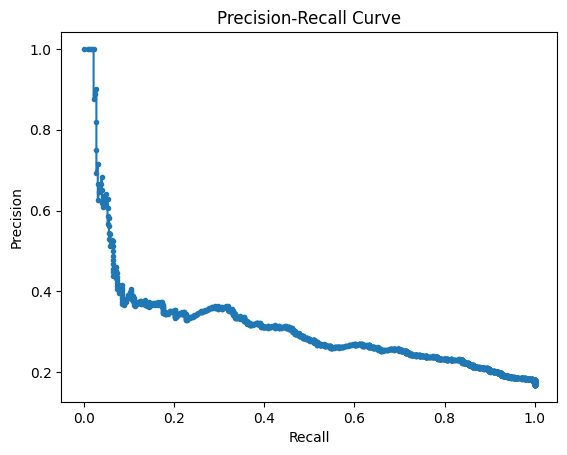

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Confusion Matrix
y_prob = model.predict(X_test)
y_pred = (y_prob >= 0.5).astype(int)  # Converts probabilities to binary labels
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve and AUC
#y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

def create_model():
    model = Sequential([
        Dense(units=12, kernel_initializer='uniform', activation='relu', input_shape=(X_train.shape[1],)),
        Dense(units=12, kernel_initializer='uniform', activation='relu'),
        Dense(units=1, kernel_initializer='uniform', activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model = create_model()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
from xgboost import XGBClassifier


modele = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
modele.fit(X_train, y_train)

y_pred = modele.predict(X_val)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluation
print("Classification Report:")
print(classification_report(y_val, y_pred_binary))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_binary))

print("ROC AUC Score:")
print(roc_auc_score(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       837
           1       0.31      0.20      0.24       144

    accuracy                           0.82       981
   macro avg       0.59      0.56      0.57       981
weighted avg       0.79      0.82      0.80       981

Confusion Matrix:
[[772  65]
 [115  29]]
ROC AUC Score:
0.5618652927120669


In [94]:
#from imblearn.over_sampling import SMOTE
#smote = SMOTE()
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
#model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), class_weight='balanced', callbacks=[early_stopping])
class_weights = {0: 1., 1: 5.}  # 1 is the weight for class 0, and 10 for class 1
model.fit(X_resampled, y_resampled, epochs=100, batch_size=20, validation_data=(X_val, y_val), class_weight=class_weights, callbacks=[early_stopping])

# Predictions
y_pred = model.predict(X_val)
y_pred_binary = (y_pred > 0.45).astype(int)

# Evaluation
print("Classification Report:")
print(classification_report(y_val, y_pred_binary))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_binary))

print("ROC AUC Score:")
print(roc_auc_score(y_val, y_pred))

Epoch 1/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6416 - loss: 1.0209 - val_accuracy: 0.3425 - val_loss: 1.3689
Epoch 2/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6400 - loss: 1.0167 - val_accuracy: 0.3333 - val_loss: 1.4549
Epoch 3/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6413 - loss: 1.0094 - val_accuracy: 0.3272 - val_loss: 1.4638
Epoch 4/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6438 - loss: 1.0006 - val_accuracy: 0.3374 - val_loss: 1.3912
Epoch 5/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6362 - loss: 1.0192 - val_accuracy: 0.3384 - val_loss: 1.3859
Epoch 6/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6476 - loss: 0.9894 - val_accuracy: 0.3527 - val_loss: 1.3101
Epoch 7/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6488 - loss: 1.0269 - val_accuracy: 0.3394 - val_loss: 1.4318
Epoch 8/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6500 - loss: 1.0066 - val_accu

In [ ]:
# prompt: une cross validation

from sklearn.model_selection import KFold

# Define the number of folds for cross-validation
n_splits = 5  # You can adjust this value

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42) #shuffle data before splitting and set random state for reproducibility

# Perform k-fold cross-validation
accuracies = []
for train_index, test_index in kf.split(X): #X is your features data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Scale the data (important for neural networks)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Create and train the model
    model = keras.Sequential([
        keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=18), #input_dim is important here!
        keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'),
        keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=10, epochs=200, verbose=0) #verbose=0 to suppress output

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)
    print('ok')

# Print the results
print("Cross-validation accuracies:", accuracies)
print("Mean accuracy:", sum(accuracies) / len(accuracies))

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Fit the model with class weights
history2 = model.fit(X_train, y_train, class_weight=class_weights_dict, epochs=200, batch_size=20)
#history2 = model.fit(X_resampled, y_resampled, batch_size = 10, epochs = 200, verbose=2)